# TITANIC PROJECT




Problem Statement:


The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 



In [1]:
## import all necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading data set
df=pd.read_csv('titanic_train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape  ## to check how many rows and columns in a data set

(891, 12)

It has 891 rows and 12 columns.

In [5]:
df.dtypes    ## it will show all the data types of feature

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
## Different data types were observed in dataset like integer,float,object,.....

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
## These are the features all the data set.

In [9]:
df.info()   ## it will show the all information about dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
## It can be seen that there are some null values present in Age, Cabin and Embarked column.

# Data Wrangling & Data Cleaning

In [11]:
df.describe()       ## it will give some stastical summary of dataset.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [13]:
## Missing values in Cabin,Age and Embarked column

In [14]:
P=df.isnull().sum()/df.isnull().count()*100   ## It will show the error in percentage(%) format.
P

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [15]:
## It shows that 77.101377% missing values in cabin , 19.86% missing values in Age and only 0.2% Missing values in Embarked
## Higher missing values can be dropped out from the dataset.
                

# Exploring Data variable

In [16]:
df.Survived.unique()

array([0, 1], dtype=int64)

In [17]:
# It has two category 0 and 1
## 0 = Not Survived
## 1 = SUrvived 

## It means Target/dependent variable categorical in nature.

# Data Visulization

To check the missing values

<AxesSubplot:>

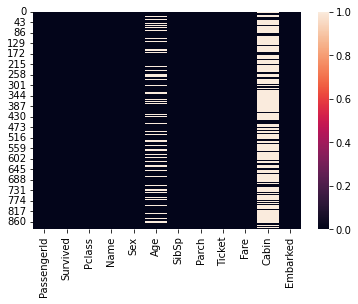

In [18]:
sns.heatmap(df.isnull())      ## it will show the null value if any null values are present or not in dataset???

This plot displays some stripes. It means this dataset has some missing values

In [19]:
! pip install missingno
import missingno as ms

Text(0.5, 1.0, 'Missing values representation')

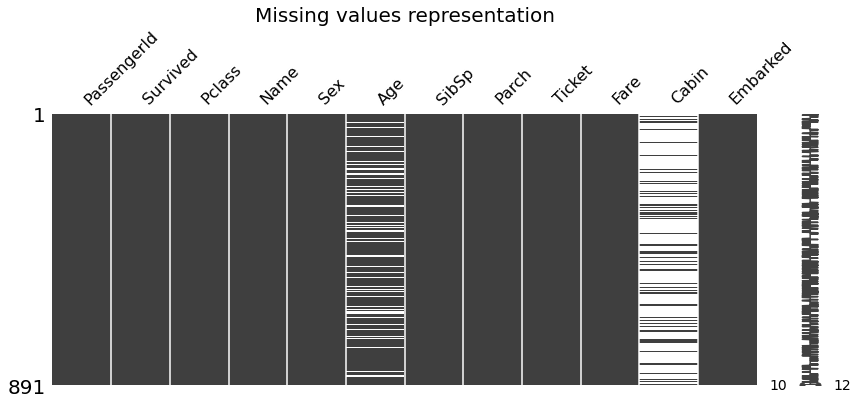

In [20]:
ms.matrix(df,figsize=(14,5))
plt.title("Missing values representation",size =20)

In [21]:
## Cabing has the highest missing values.

Text(0.5, 1.0, 'Bar chart representation for missing values')

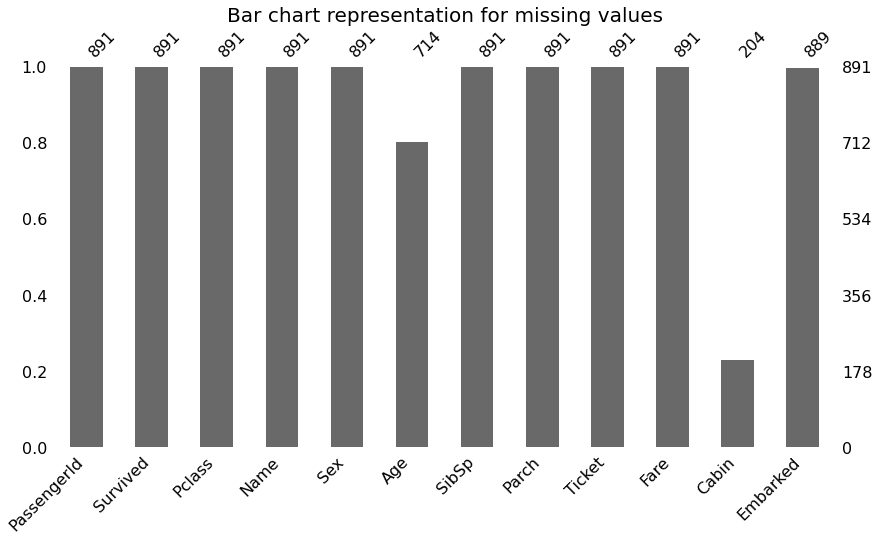

In [22]:
ms.bar(df,figsize=(14,7))
plt.title("Bar chart representation for missing values",size = 20)

# Removing of missing values

In [23]:
df["Age_mean"]=df["Age"].fillna(df['Age'].mean())

<function matplotlib.pyplot.legend(*args, **kwargs)>

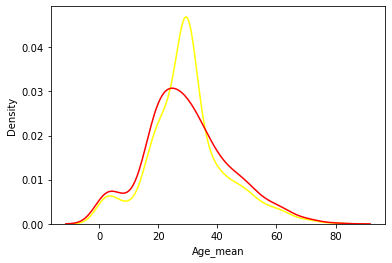

In [24]:
sns.kdeplot(df["Age_mean"],color="Yellow",label='Mean')
sns.kdeplot(df["Age"],color="Red",label='original')
plt.legend

In [25]:
##  Red color line shows that there were some missing values.
##  Yellow Color line shows that value by replacing it mean values.

In [26]:
df["Age"]=df["Age"].fillna(df['Age'].mean())

# Remove some features

In [27]:
df.drop(["Cabin","Ticket","Fare","PassengerId","Name"],axis=1,inplace=True)

In [28]:
## These are some features which is not useful for data analysis so it was dropped out from dataset.

In [29]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_mean
0,0,3,male,22.000000,1,0,S,22.000000
1,1,1,female,38.000000,1,0,C,38.000000
2,1,3,female,26.000000,0,0,S,26.000000
3,1,1,female,35.000000,1,0,S,35.000000
4,0,3,male,35.000000,0,0,S,35.000000
5,0,3,male,29.699118,0,0,Q,29.699118
6,0,1,male,54.000000,0,0,S,54.000000
7,0,3,male,2.000000,3,1,S,2.000000
8,1,3,female,27.000000,0,2,S,27.000000
9,1,2,female,14.000000,1,0,C,14.000000


In [30]:
df.drop(["Age_mean"],axis=1,inplace=True)

In [31]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
5,0,3,male,29.699118,0,0,Q
6,0,1,male,54.000000,0,0,S
7,0,3,male,2.000000,3,1,S
8,1,3,female,27.000000,0,2,S
9,1,2,female,14.000000,1,0,C


# Analysis of survived or Not Survived Passengers

In [32]:
pd.DataFrame({' ':['Not Survived','Survived'],'Value counts':df['Survived'].value_counts(),
              'Percentage(%)':[(df["Survived"]==0).sum()*100/len(df),(df["Survived"]==1).sum()*100/len(df)]}).set_index(' ').head()
             
              

,Value counts,Percentage(%)
,,
Not Survived,549,61.616162
Survived,342,38.383838


In [33]:
## it shows that 549 passengers not survived and 342 passengers survived during titanic sink.

# Representation os passengers by survived or not survived y pie chart

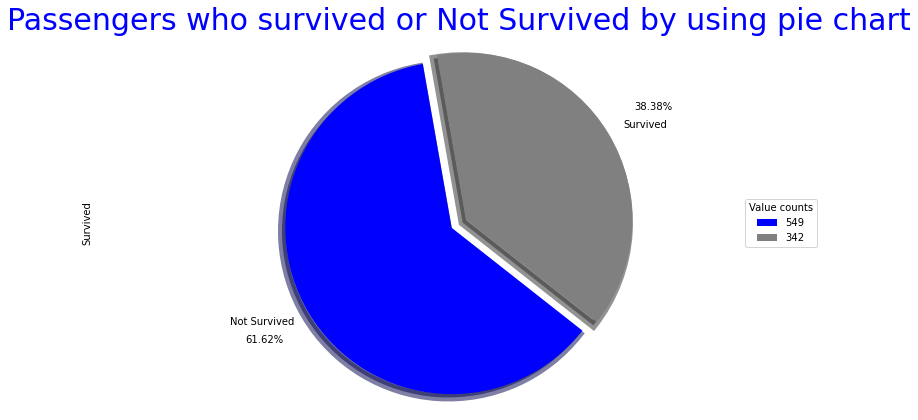

In [34]:
df["Survived"].value_counts().plot(kind='pie',figsize=(13,7),startangle=100,autopct='%1.2f%%',shadow=True,
                                  labels=["Not Survived","Survived"],pctdistance=1.31,
                                  wedgeprops={'linewidth':8},
                                  colors=["Blue","Grey"],
                                  explode=[0.1,0])
plt.title("Passengers who survived or Not Survived by using pie chart",c="b",size=30
          ,y=0.99)
plt.axis("equal")
plt.legend(title="Value counts",
          labels=df["Survived"].value_counts(),loc="center right")

# Countplot Visualization by bar chart

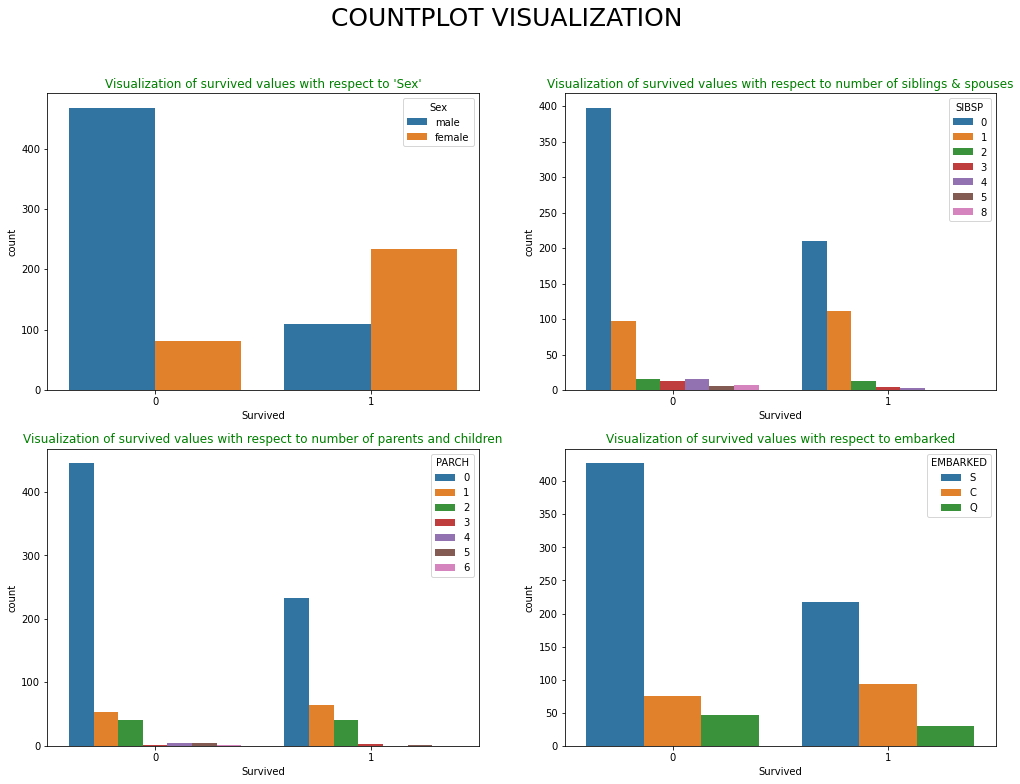

In [35]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(17,12));
fig.suptitle('COUNTPLOT VISUALIZATION', c='Black',size=25)

sns.countplot("Survived",data=df, hue = "Sex" , ax=axs[0][0])
axs[0][0].set_title("Visualization of survived values with respect to 'Sex'",c='Green')

sns.countplot("Survived",data=df, hue = "SibSp" , ax=axs[0][1])
axs[0][1].set_title("Visualization of survived values with respect to number of siblings & spouses",c='Green')
axs[0][1].legend(title='SIBSP', loc='upper right')

sns.countplot("Survived",data=df, hue = "Parch" , ax=axs[1][0])
axs[1][0].set_title("Visualization of survived values with respect to number of parents and children",c='Green')
axs[1][0].legend(title='PARCH', loc='upper right')

sns.countplot("Survived",data=df, hue = "Embarked" , ax=axs[1][1])
axs[1][1].set_title("Visualization of survived values with respect to embarked",c='Green')
axs[1][1].legend(title='EMBARKED', loc='upper right')

plt.show()

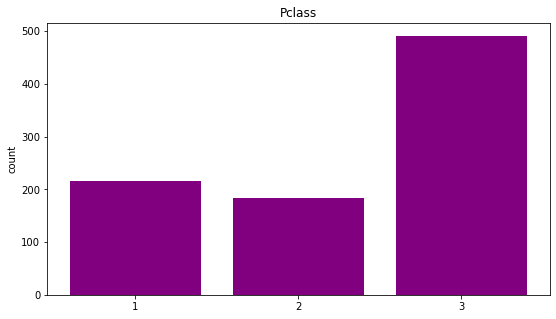

Pclass 
3    491
1    216
2    184
Name: Pclass, dtype: int64


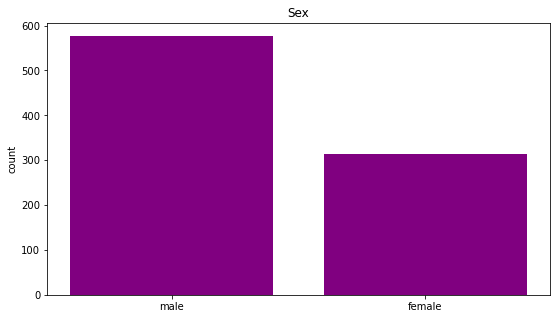

Sex 
male      577
female    314
Name: Sex, dtype: int64


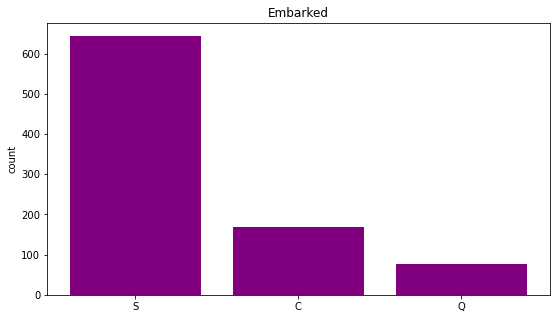

Embarked 
S    644
C    168
Q     77
Name: Embarked, dtype: int64


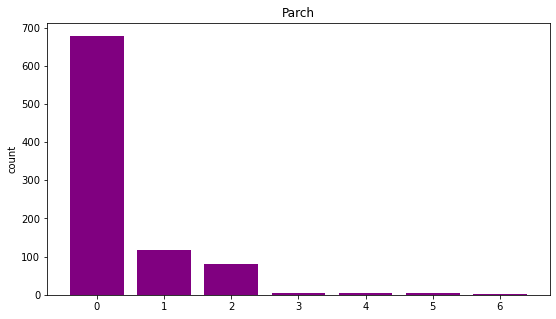

Parch 
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


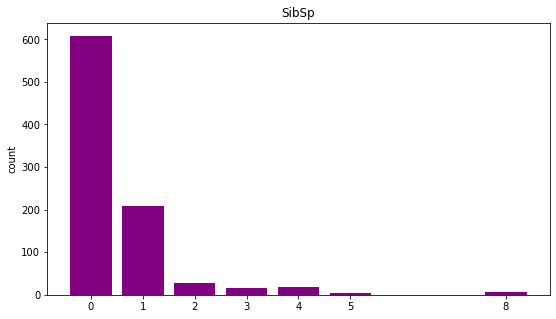

SibSp 
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [36]:
def bar_graph(features):
    feature=df[features];
    feature_val = feature.value_counts();
    
    plt.figure(figsize=(9,5))
    plt.bar(feature_val.index,feature_val,color='purple');
    plt.title(features);
    plt.xticks(feature_val.index, feature_val.index.values);
    plt.ylabel("count");
    
    plt.show();
    
    print("{} \n{}".format(features,feature_val));
    
cols=["Pclass","Sex","Embarked","Parch","SibSp"]

for i in cols:
    bar_graph(i)

<AxesSubplot:>

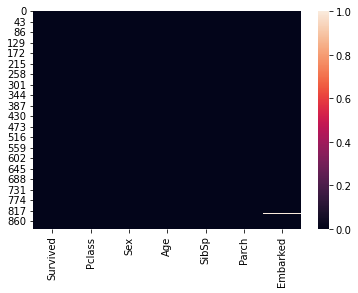

In [37]:
sns.heatmap(df.isnull()) 

In [38]:
## Now there is no null values in Dataset

# Check Correlation

In [39]:
dfcor=df.corr()    ## To check the coreelation in dataset

In [40]:
dfcor

,Survived,Pclass,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000


<AxesSubplot:>

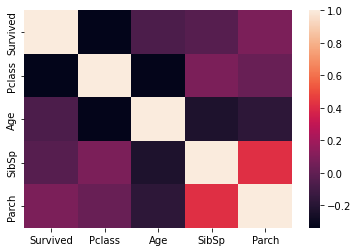

In [41]:
sns.heatmap(dfcor)   ## Graphical represntation of correlation of datset by seaborn

<AxesSubplot:>

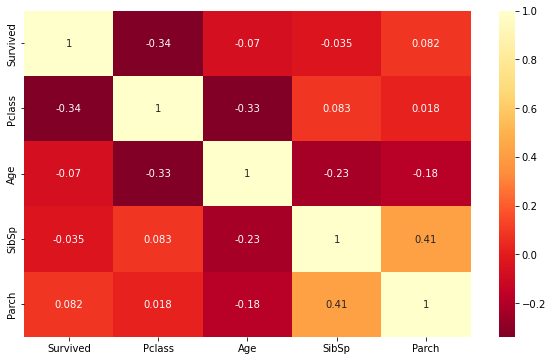

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

In [43]:
## Observation : Parch has good correlation

# To check distribution of skewness

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

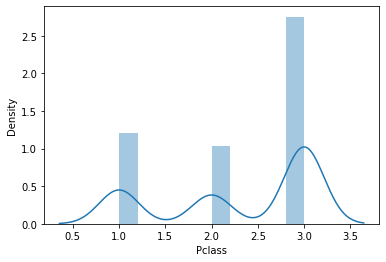

In [44]:
sns.distplot(df['Pclass'])     ## For normal distribution 

<AxesSubplot:xlabel='Age', ylabel='Density'>

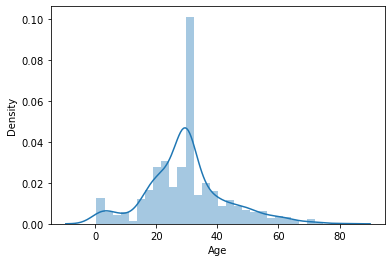

In [45]:
sns.distplot(df['Age'])     ## For normal distribution 

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

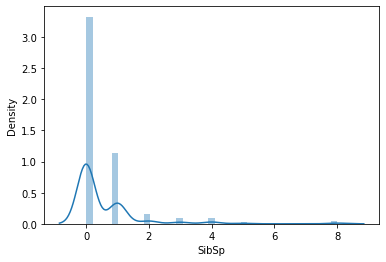

In [46]:
sns.distplot(df['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

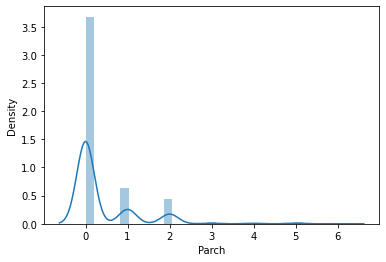

In [47]:
sns.distplot(df['Parch'])

In [48]:
from sklearn.preprocessing import LabelEncoder
lben=LabelEncoder()

df["Sex"]=lben.fit_transform(df["Sex"].values)
df["Embarked"]=lben.fit_transform(df["Embarked"].values)

In [49]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


<AxesSubplot:xlabel='Embarked', ylabel='Density'>

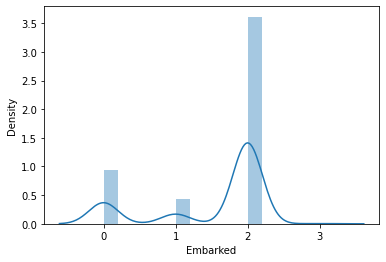

In [50]:
sns.distplot(df['Embarked'])

A little skewness is present in all columns it can be removed out.

# Removing of skewness

In [51]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Embarked   -1.246689
dtype: float64

In [52]:

df['SibSp']=np.sqrt(df['SibSp'])
df['Parch']=np.sqrt(df['Parch'])
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       1.436526
Parch       1.529799
Embarked   -1.246689
dtype: float64

In [53]:
X=df.iloc[:,1:7]
Y=df.loc[:,"Survived"]

# Training Process begins

In [59]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

# Best random state

In [60]:
maxAccu=0  ## maximum accuracy
maxRS=0   ## best random state value for which max accuracy is achieved

for i in range(1,200):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(X_train,Y_train)   ## fitting the data will train your model
    predrf=LR.predict(X_test)   ## this is the predicted target variable
    acc=accuracy_score(Y_test,predrf)  ## accuracy score
    print('accuracy',acc,'random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
        ## print('accuracy',maxAccu, 'random_state' i)

accuracy 0.7988826815642458 random_state 1
accuracy 0.776536312849162 random_state 2
accuracy 0.7597765363128491 random_state 3
accuracy 0.8268156424581006 random_state 4
accuracy 0.8156424581005587 random_state 5
accuracy 0.8603351955307262 random_state 6
accuracy 0.7541899441340782 random_state 7
accuracy 0.7653631284916201 random_state 8
accuracy 0.770949720670391 random_state 9
accuracy 0.8212290502793296 random_state 10
accuracy 0.8379888268156425 random_state 11
accuracy 0.7877094972067039 random_state 12
accuracy 0.8324022346368715 random_state 13
accuracy 0.7988826815642458 random_state 14
accuracy 0.8100558659217877 random_state 15
accuracy 0.7262569832402235 random_state 16
accuracy 0.7653631284916201 random_state 17
accuracy 0.8603351955307262 random_state 18
accuracy 0.8212290502793296 random_state 19
accuracy 0.8100558659217877 random_state 20
accuracy 0.7988826815642458 random_state 21
accuracy 0.7877094972067039 random_state 22
accuracy 0.7486033519553073 random_state 23

In [61]:
print("Best accuracy is ", maxAccu," on Random_state",maxRS)

Best accuracy is  0.8603351955307262  on Random_state 6


In [62]:
## i found best random state 6. i will apply it for further process.

# Creating train_test_split

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=6)

# Different models to find out the best accuracy

In [64]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,Y_train) 
predlr=LR.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predlr)*100)
print(confusion_matrix(Y_test,predlr))
print(classification_report(Y_test,predlr))

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train) 
preddt=dt.predict(X_test)
print("Accuracy",accuracy_score(Y_test,preddt)*100)
print(confusion_matrix(Y_test,preddt))
print(classification_report(Y_test,preddt))

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train) 
predrf=rf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predrf)*100)
print(confusion_matrix(Y_test,predrf))
print(classification_report(Y_test,predrf))


from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,Y_train) 
predsvc=svc.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predsvc)*100)
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier()
KN.fit(X_train,Y_train) 
predKN=svc.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predKN)*100)
print(confusion_matrix(Y_test,predKN))
print(classification_report(Y_test,predKN))

from sklearn.naive_bayes import GaussianNB
GNB=KNeighborsClassifier()
GNB.fit(X_train,Y_train) 
predGNB=svc.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predGNB)*100)
print(confusion_matrix(Y_test,predGNB))
print(classification_report(Y_test,predGNB))



Accuracy 86.03351955307262
[[105   8]
 [ 17  49]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       113
           1       0.86      0.74      0.80        66

    accuracy                           0.86       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179

Accuracy 83.24022346368714
[[104   9]
 [ 21  45]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       113
           1       0.83      0.68      0.75        66

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179

Accuracy 84.91620111731844
[[103  10]
 [ 17  49]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       113
           1       0.83      0.74      0.78        66

    accuracy                    

# Comparision of all classifiers values with Cross validation

In [68]:
from sklearn.model_selection import cross_val_score

scr1=cross_val_score(LR,X,Y,cv=8)
scr2=cross_val_score(dt,X,Y,cv=8)
scr3=cross_val_score(rf,X,Y,cv=8)
scr4=cross_val_score(svc,X,Y,cv=8)
scr5=cross_val_score(KN,X,Y,cv=8)
scr6=cross_val_score(GNB,X,Y,cv=8)


print("Cross Validation score of Logistic Regresssion model : ",scr1.mean())
print("Cross Validation score of Decision Tree Classifier : ",scr2.mean())
print("Cross Validation score of Random Forest Classifier : ",scr3.mean())
print("Cross Validation score of SVC : ",scr4.mean())
print("Cross Validation score of KNeighbors classifier : ",scr5.mean())
print("Cross Validation score of GaussianNB : ",scr6.mean())




Cross Validation score of Logistic Regresssion model :  0.8013493404118404
Cross Validation score of Decision Tree Classifier :  0.7879564832689833
Cross Validation score of Random Forest Classifier :  0.801429777992278
Cross Validation score of SVC :  0.6364221364221364
Cross Validation score of KNeighbors classifier :  0.7700289575289575
Cross Validation score of GaussianNB :  0.7700289575289575


# Hyper Parameter tunning

In [69]:
RandomForestClassifier()

RandomForestClassifier()

In [70]:
from sklearn.model_selection import GridSearchCV

## creating parameter list to pass in GridSearchCv

parameters= {'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8],
            'criterion':['gini','entropy']}

In [71]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=8,scoring="accuracy")
GCV.fit(X_train,Y_train)  ## fitiing the data in model
GCV.best_params_   ## Printing the best parameter found by GridSearchCV

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto'}

In [72]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [73]:
GCV.best_estimator_

RandomForestClassifier(max_depth=4)

In [74]:
GCV_pred=GCV.best_estimator_.predict(X_test)   ## predicting with best parameters
accuracy_score(Y_test,GCV_pred) ## Checking final accuracy

0.8659217877094972

# ROC AUC PLOT

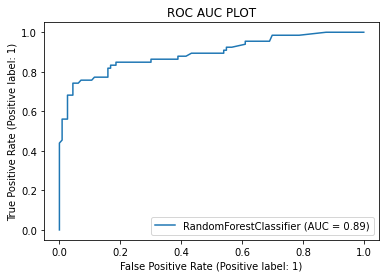

In [75]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,X_test,Y_test)
plt.title("ROC AUC PLOT")
plt.show()

# Random classifier & Logistic regression are the best model for this dataset. 

# Saving the model in pickle format

In [77]:
## PICKeling of file or serialization of a file

import joblib
joblib.dump(GCV.best_estimator_,"Titanic.pkl")

['Titanic.pkl']

# Observation : If i remove the outlier from the dataset so i get less accuracy (~77.0%). I didnot remove outlier to get higher accuracy.    